![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [34]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [35]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [36]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [37]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:title={'center':'Sentiminetos por aerolínea'}, xlabel='airline'>

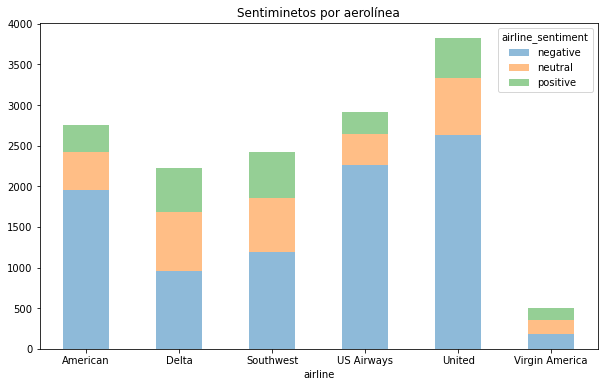

In [38]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [40]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [41]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [42]:
# Celda 1
from sklearn.metrics import accuracy_score
# Vector entrenamiento y Test
vect_A = CountVectorizer(lowercase=False)
X_train = vect_A.fit_transform(X_train)
X_test = vect_A.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Entrenamos el modelo
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy0 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy0}")

Accuracy: 0.7628311258278145


Se realizó una implementación de un modelo de Random Forest, utilizando la función CountVectorizer para crear matrices de un conjunto de tweets y su sentimiento asociado. Se calcula la precision del modelo con la función accuracy_score (0.7628).

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [43]:
# Celda 2
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

import nltk
#nltk.download('stopwords')
spa_stopwords = nltk.corpus.stopwords.words('spanish')

vect_B = CountVectorizer(stop_words=spa_stopwords, lowercase=False)
X_train = vect_B.fit_transform(X_train)
X_test = vect_B.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Entrenamos el modelo
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy1}")

Accuracy: 0.7636589403973509


Para continuar, creamos matrices usando CountVectorizer y eliminación de Stopwords. Podemos observar una pequeña mejora en la metrica con respecto al primer punto, este obtuvo un valor de 0.7636.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [44]:
# Celda 3
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Lematización
import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')
wordnet_lemmatizer = WordNetLemmatizer()

# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]

vect_C = CountVectorizer(analyzer=split_into_lemmas, lowercase=False)
X_trainC = vect_C.fit_transform(X_train)
X_testC = vect_C.transform(X_test)

# Modelo RF
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Entrenamos el modelo
rf.fit(X_trainC, y_train)
y_pred = rf.predict(X_testC)

accuracy2 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy2}")

Accuracy: 0.7595198675496688


Para el desarrollo del punto 3, creamos matrices usando lematización con verbos. Luego de ajustar el modelo, realizamos las predicción y obtuvimos un accuracy de 0.7595 . Este modelo presenta una disminución en la metrica con respecto a los resultados observados en el punto 1 y punto 2.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [45]:
# Celda 4
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

vect_D = CountVectorizer(stop_words=spa_stopwords, analyzer=split_into_lemmas, lowercase=True)
X_trainD = vect_D.fit_transform(X_train)
X_testD = vect_D.transform(X_test)

# Modelo RF
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos el modelo
rf.fit(X_trainD, y_train)
y_pred = rf.predict(X_testD)

accuracy3 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy3}")

Accuracy: 0.7595198675496688


Para el desarrollo del punto 4, creamos matrices usando la función CountVectorizer, eliminar stopwords, y lematizando el texto con verbos. Luego de ajustar el modelo, realizamos las predicción y obtuvimos un accuracy de 0.7595. Este modelo se mantiene con respesto al anterior.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

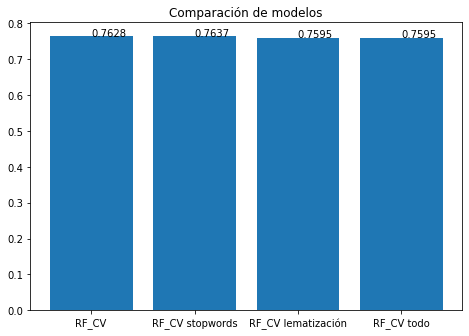

In [46]:
# Celda 5

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#Asignamos el titulo
ax.set_title("Comparación de modelos")

ejeX = [ 'RF_CV','RF_CV stopwords', 'RF_CV lematización', 'RF_CV todo']
ejeY = [round(accuracy0,4),round(accuracy1,4),round(accuracy2,4),round(accuracy3,4)]
ax.bar(ejeX,ejeY)

def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

En conclusión el mejor modelo es RF_CountVectorizer stopwords, seguido de RF_CV y por último los modelos RF_CountVectorizer lematización y RF_CountVectorizer lematización todo con el mismo accuracy. Se puede observar que el primero y el segundo modelo tienen un rendimiento similar y el segundo modelo, que elimina las stopwords, podría haber mejorado ligeramente el rendimiento al eliminar palabras que no son útiles para la clasificación de sentimientos. El tercer y cuarto modelo, que lematizan el texto con verbos/todo parece tener un rendimiento ligeramente inferior en comparación con el primer y segundo modelo, pero aún así tiene un rendimiento razonable. Puede ser posible que aunque lematizar el texto con verbos puede ser útil para reducir la cantidad de características y ruido en el texto, también puede estar eliminando información importante para la clasificación.

A continuación se presentan las ventajas del mejor modelo y las desventajas del modelo con menor rendimiento. 

**Ventajas del segundo modelo:**
El modelo puede reducir el ruido en el texto y enfocarse en las palabras más importantes para la clasificación de sentimientos al eliminar las stopwords.
Adicional a esto, debido a que se están eliminando palabras irrelevantes, es posible que el modelo requiera menos tiempo y recursos para entrenar y hacer predicciones. Por ultimo, es posible que el modelo tenga una mejor capacidad de generalización y pueda manejar mejor los datos de prueba.

**Desventajas del tercer y cuarto modelo:**
Es posible que la lematización con verbos haya sido un paso innecesario que agregó complejidad al modelo y no mejoró la precisión de la clasificación de sentimientos. Al lematizar el texto con verbos, es posible que el modelo pierda información relevante para la clasificación de sentimientos. Por esta razón, el modelo puede haber eliminado información útil al lematizar todas las palabras con verbos, lo que podría haber reducido la precisión. 
